## Problem Statement
<p>In this notebook, we'll take a dive into the world of social media text classification by investigating how to properly classify tweets from two prominent North American politicians: Donald Trump and Justin Trudeau.</p>

<p>To begin, we will import all the tools we need from scikit-learn. We will need to properly vectorize our data (<code>CountVectorizer</code> and <code>TfidfVectorizer</code>). And we will also want to import some models, including <code>MultinomialNB</code> from the <code>naive_bayes</code> module, <code>LinearSVC</code> from the <code>svm</code> module and <code>PassiveAggressiveClassifier</code> from the <code>linear_model</code> module. Finally, we'll need <code>sklearn.metrics</code> and <code>train_test_split</code> and <code>GridSearchCV</code> from the <code>model_selection</code> module to evaluate and optimize our model.</p>

In [22]:
# Set seed for reproducibility
import random; random.seed(53)

# Import all we need from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics

We'll start with a corpus of tweets which were collected in November 2017. They are available in CSV format. We'll start by importing the data and pass it to scikit-learn for further processing.

We'll also use df.head() and df.tail() to get a feel of how the data looks like. df.head() is usually used to see the columns and data so we can get familiar with the dataset, however in the case we will also use df.tail() since Trudeau's tweets are all at the bottom. This way we can get a quick sneak peak on how their tweets differ.

In [2]:
import pandas as pd

# Load data
tweet_df = pd.read_csv('datasets/tweets.csv')

In [4]:
tweet_df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [5]:
tweet_df.tail()

,id,author,status
395,396,Justin Trudeau,RT @googlecanada: Watch tmw: @JustinTrudeau di...
396,397,Justin Trudeau,"Today in Ottawa, I met with the Modern Treaty ..."
397,398,Justin Trudeau,Voici le sommaire de ma rencontre avec les Pre...
398,399,Justin Trudeau,RT @VeteransENG_CA: #Day1 of 11 Days of Rememb...
399,400,Justin Trudeau,RT @VeteransFR_CA: #Jour1 des 11 jours pour se...



Since the data has been collected via the Twitter API and not split into test and training sets, we'll need to do this. We will use train_test_split() with a test size of 0.3 and random_state=53 to ensure we have enough test data and also get the same results no matter where or when we run this code.


In [16]:
# Create target
y = tweet_df.author

# Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(tweet_df['status'], y, test_size=0.3, 
                 random_state=53)

<p>We have the training and testing data all set up, but we need to create vectorized representations of the tweets in order to apply machine learning.</p>
<p>To do so, we will utilize the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> classes which we will first need to fit to the data.</p>
<p>Once this is complete, we can start modeling with the new vectorized tweets!</p>

In [17]:
# Initialize count vectorizer
count_vectorizer = CountVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create count train and test variables
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

# Initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', 
                                   min_df=0.05, max_df=0.9)

# Create tfidf train and test variables
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Training a Multinomial Naive Bayes model
<p>Now that we have the data in vectorized form, we can train the first model. Investigate using the Multinomial Naive Bayes model with both the <code>CountVectorizer</code> and <code>TfidfVectorizer</code> data. We will pick the method that has the best score.
<p>To assess the accuracies, we will print the test sets accuracy scores for both models.</p>

In [18]:
tfidf_nb = MultinomialNB()
tfidf_nb.fit(tfidf_train, y_train)
tfidf_nb_pred = tfidf_nb.predict(tfidf_test)
tfidf_nb_score = metrics.accuracy_score(y_test, tfidf_nb_pred)

count_nb = MultinomialNB()
count_nb.fit(count_train, y_train)
count_nb_pred = count_nb.predict(count_test)
count_nb_score = metrics.accuracy_score(y_test, count_nb_pred)

print('NaiveBayes Tfidf Score: ', tfidf_nb_score)
print('NaiveBayes Count Score: ', count_nb_score)

NaiveBayes Tfidf Score:  0.7916666666666666
NaiveBayes Count Score:  0.7833333333333333


<p>We see that the TF-IDF model performs better than the count-based approach. A reason for this is that TF-IDF is able to find weights of certain words, and can identify words that too abundant, or too rare. It penalizes thw words that are too abundant or too rare in the corpus by giving them low tfidf scores. The count-based approach however, does not have this ability.</p>
<p>For classification tasks, an accuracy score doesn't tell the whole picture. A better evaluation can be made if we look at the confusion matrix, which shows the number correct and incorrect classifications based on each class. We can use the metrics, True Positives, False Positives, False Negatives, and True Negatives, to determine how well the model performed on a given class. We will be able to answer questions such as 'How many times was Trump misclassified as Trudeau?'</p>

Confusion matrix, without normalization
Confusion matrix, without normalization


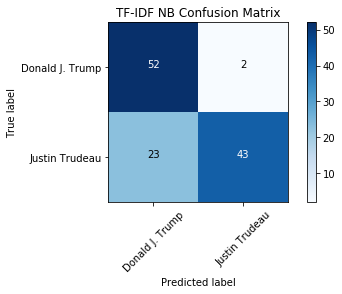

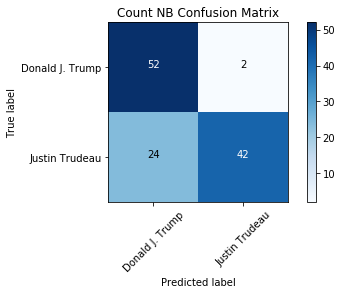

In [19]:
%matplotlib inline
from datasets.helper_functions import plot_confusion_matrix


tfidf_nb_cm = metrics.confusion_matrix(y_test, tfidf_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
count_nb_cm = metrics.confusion_matrix(y_test, count_nb_pred, labels=['Donald J. Trump', 'Justin Trudeau'])

plot_confusion_matrix(tfidf_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF NB Confusion Matrix")

plot_confusion_matrix(count_nb_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="Count NB Confusion Matrix", figure=1)

<p>So the Bayesian model only has one prediction difference between the TF-IDF and count vectorizers -- fairly impressive! Interestingly, there is some confusion when the predicted label is Trump but the actual tweeter is Trudeau. If we were going to use this model, we would want to investigate what tokens are causing the confusion in order to improve the model. </p>

## Training a Linear SVC model

<p>Now that we've seen what the Bayesian model can do,let's try another approach. LinearSVC is another popular choice for text classification. Let's see if using it with the TF-IDF vectors improves the accuracy of the classifier.</p>

LinearSVC Score:   0.842
Confusion matrix, without normalization


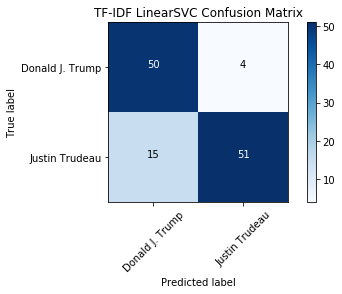

In [20]:
tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=['Donald J. Trump', 'Justin Trudeau'])
plot_confusion_matrix(svc_cm, classes=['Donald J. Trump', 'Justin Trudeau'], title="TF-IDF LinearSVC Confusion Matrix")

<p>The LinearSVC model is even better than the Multinomial Bayesian one. Via the confusion matrix we can see that, although there is still some confusion where Trudeau's tweets are classified as Trump's, the False Positive rate is better than the previous model.</p>
<p>We might be able to continue tweaking and improving all of the previous models by learning more about parameter optimization or applying some better preprocessing of the tweets. </p>
<p>Next let's see what the model has learned. Using the LinearSVC Classifier with two classes (Trump and Trudeau) we can sort the features (tokens), by their weight and see the most important tokens for both Trump and Trudeau. Lets see what are the most Trump-like or Trudeau-like words. </p>

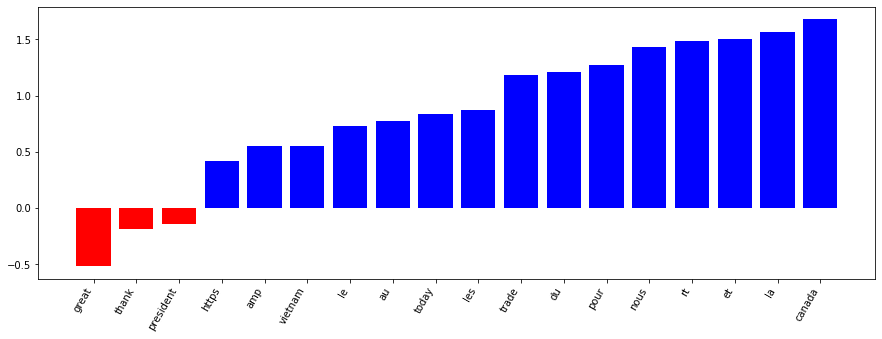

[(-0.5173058487820146, 'great'),
 (-0.18902604460699798, 'thank'),
 (-0.1374359841307469, 'president'),
 (0.41741154185497586, 'https'),
 (0.5481074683421869, 'amp'),
 (0.5494712818954394, 'vietnam'),
 (0.7312309557055726, 'le'),
 (0.7787181536791514, 'au'),
 (0.8337149570472819, 'today'),
 (0.8703093203053552, 'les'),
 (1.1798223484719574, 'trade'),
 (1.213367426929573, 'du'),
 (1.2696832758825918, 'pour'),
 (1.4330777201001939, 'nous'),
 (1.485377385255135, 'rt'),
 (1.5045007358084834, 'et'),
 (1.564089579571599, 'la'),
 (1.6777773671123695, 'canada')]


In [21]:
from datasets.helper_functions import plot_and_return_top_features

from pprint import pprint
top_features = plot_and_return_top_features(tfidf_svc, tfidf_vectorizer)
pprint(top_features)

<p>Interesting, it seems like it the key thing the model learned is that Trudeau tweets in French, pretty cool!</p>

## Conclusion
<p> We saw that TD-IDF works better than the Count-Vectorized approach using the Multinomial Naive Bayes Model. We then tried the LinearSVC classifier with TD-IDF vectorizer, which worked even better than Multinomial Naive Bayes Model, which an accuracy of 84.2%.</p>
<p>Future work on this dataset could involve:</p>
<ul>
<li>Add extra preprocessing (such as removing URLs or French stop words) and see the effects</li>
<li>Use GridSearchCV to improve both Bayesian and LinearSVC models by finding the optimal parameters</li>
<li>Introspect the Bayesian model to determine what words are more Trump- or Trudeau- like</li>
<li>Add more recent tweets to the dataset using tweepy and retrain</li>
</ul>